In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Problem Statement: Given a dataset which captures the salary from July 1, 2013 through June 30, 2014. It includes only those employees who were employed on June 30, 2014. Predict the salaries for employees working in Blatimore.

In [5]:
# Importing the dataset
df=pd.read_csv("/content/drive/MyDrive/Projects and Datasets/baltimore-salary-dataset.csv")
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [7]:
df.shape

(18981, 7)

In [8]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [9]:
# Checking for null values
df.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [11]:
# Making a copy of original DataFrame
newdf=df.copy()

In [12]:
# Removing the leading and trailing spaces and converting all the columns into the lowercase
newdf.columns=newdf.columns.str.strip().str.lower()
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')

In [13]:
# Deleting the column "grosspay"
newdf.drop("grosspay",axis=1,inplace=True)

In [14]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary'], dtype='object')

In [15]:
# Value_counts() for agencyid
newdf.agencyid.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02539      1
A65052      1
W02106      1
W02590      1
W02339      1
Name: agencyid, Length: 1177, dtype: int64

In [16]:
# Remove the $ from the annual salary column and change the dtype to float
newdf["annualsalary"]=newdf["annualsalary"].str.strip("$").astype("float")

In [17]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [18]:
# Breaking hiredate to Day, Month, Year
newdf['hiremonth'] = newdf['hiredate'].str.split('/').str[0]
newdf['hireday'] = newdf['hiredate'].str.split('/').str[1]
newdf['hireyear'] = newdf['hiredate'].str.split('/').str[2]

newdf=newdf.fillna(0)
newdf['hiremonth'] = newdf['hiremonth'].astype(int)
newdf['hireday'] = newdf['hireday'].astype(int)
newdf['hireyear'] = newdf['hireyear'].astype(int)

In [19]:
# Deleting the column "hiredate" and reindexing all the columns
newdf.drop("hiredate",axis=1,inplace=True)

new_cols = ["name","jobtitle","agencyid","agency","hireday","hiremonth","hireyear","annualsalary"]
newdf=newdf.reindex(columns=new_cols)
newdf.rename(columns={"hireday":"hiredate"},inplace=True)

In [20]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,hiremonth,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10,6,2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24,10,1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25,9,2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23,7,2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24,7,2013,43999.0


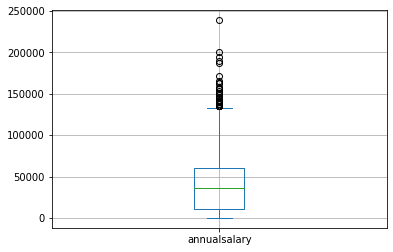

In [21]:
# Plot a boxplot for annualsalary
newdf.annualsalary.plot.box()
plt.grid()

Text(0.5, 1.0, 'Top 10 Hiring Jobs')

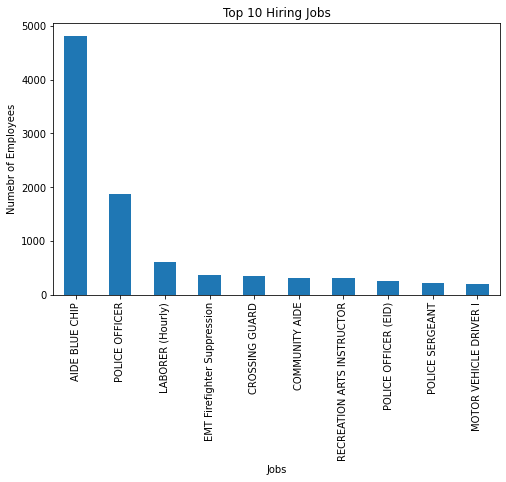

In [22]:
# Plot top 10 jobs based on hiring
plt.figure(figsize=(8,5))
newdf.groupby(["jobtitle"])["agency"].count().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel('Jobs')
plt.ylabel('Numebr of Employees')
plt.title('Top 10 Hiring Jobs')

Text(0.5, 1.0, 'Top 10 Jobs based on Salary')

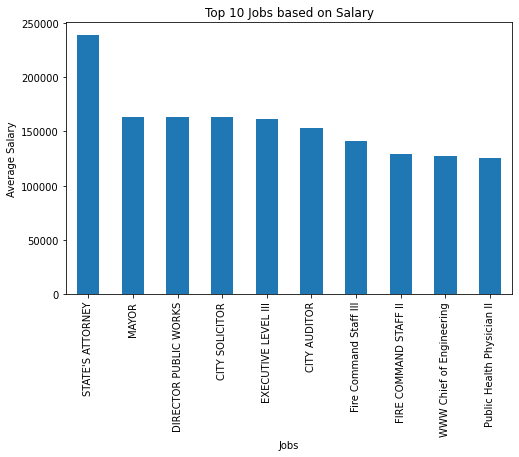

In [23]:
# Plot top 10 jobs based on salary
plt.figure(figsize=(8,5))
newdf.groupby(["jobtitle"])["annualsalary"].mean().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel('Jobs')
plt.ylabel('Average Salary')
plt.title('Top 10 Jobs based on Salary')

Text(0.5, 1.0, 'Top 10 Agency ID with highest number of employees')

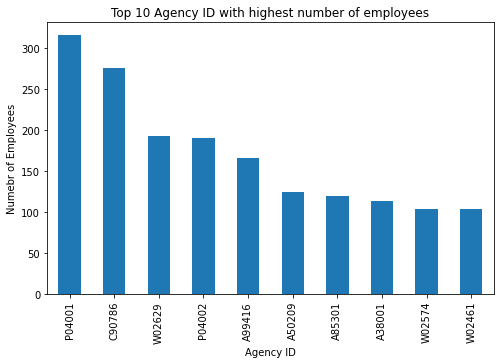

In [ ]:
# Plot top 10 agency's ID that has highest number of employees
plt.figure(figsize=(8,5))
newdf.groupby(["agencyid"])["name"].count().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel('Agency ID')
plt.ylabel('Numebr of Employees')
plt.title('Top 10 Agency ID with highest number of employees')

Text(0.5, 1.0, 'Average Salary v/s Hired Year')

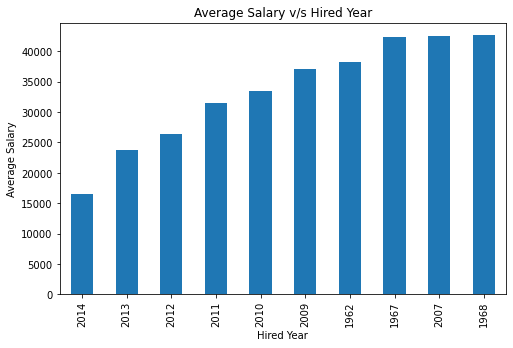

In [ ]:
# Plot average salary v/s year graph
plt.figure(figsize=(8,5))
newdf.groupby(["hireyear"])["annualsalary"].mean().sort_values().head(10).plot.bar()
plt.xlabel('Hired Year')
plt.ylabel('Average Salary')
plt.title('Average Salary v/s Hired Year')

Text(0.5, 1.0, 'Number of Employees v/s Hired Month')

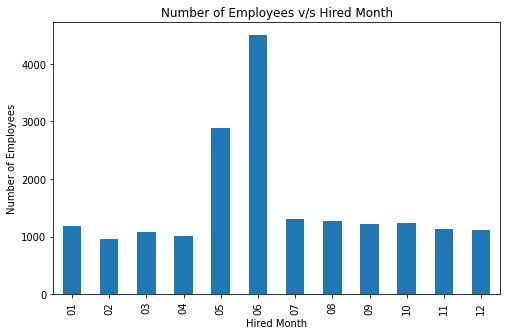

In [ ]:
# Plot a graph to check in which month most of the people are hired
plt.figure(figsize=(8,5))
newdf.groupby(["hiremonth"])["name"].count().plot.bar()
plt.xlabel('Hired Month')
plt.ylabel('Number of Employees')
plt.title('Number of Employees v/s Hired Month')

<Figure size 720x720 with 0 Axes>

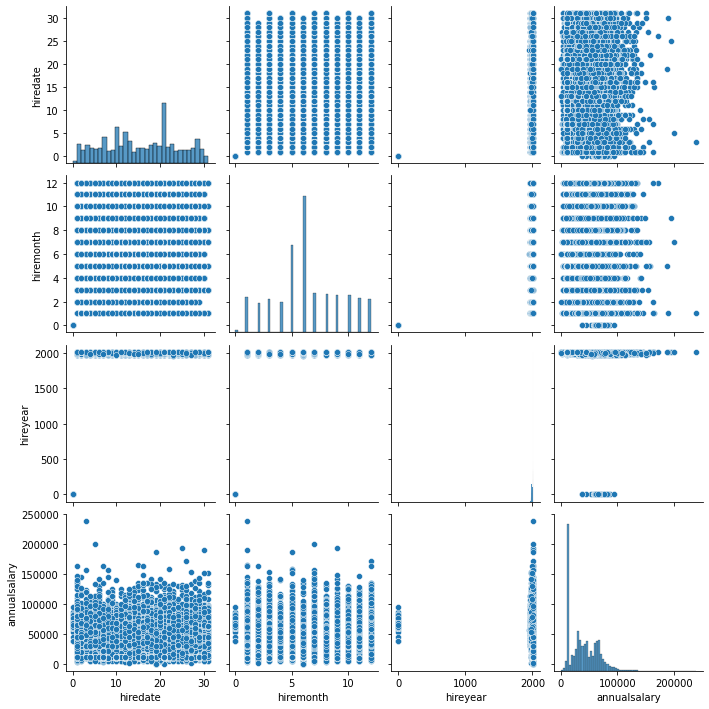

In [ ]:
# Plot a pairplot
plt.figure(figsize=(10,10))
sns.pairplot(newdf)
plt.show()

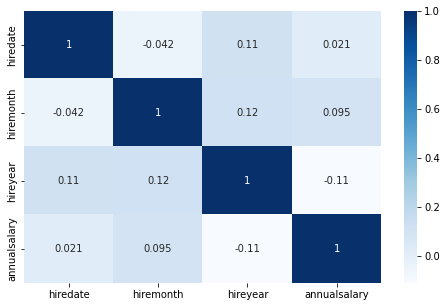

In [ ]:
# Plot a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(newdf.corr(),annot=True,cmap= "Blues")

Machine Learning

In [ ]:
# Map jobtitle to its mean salary 
mean_encoded_jobtitle=newdf.groupby('jobtitle')['annualsalary'].mean()
newdf['jobtitle']=newdf['jobtitle'].map(mean_encoded_jobtitle)
newdf['jobtitle']

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: jobtitle, Length: 18981, dtype: float64

In [ ]:
# Map agency to its mean salary 
mean_encoded_agency=newdf.groupby('agency')['annualsalary'].mean()
newdf['agency']=newdf['agency'].map(mean_encoded_agency)
newdf['agency']

0        11310.270645
1        51495.424242
2        65360.307263
3        39980.900360
4        61670.920274
             ...     
18976    11310.270645
18977    11346.315789
18978    61670.920274
18979    61670.920274
18980    42565.513078
Name: agency, Length: 18981, dtype: float64

In [ ]:
# Map agencyid to its mean salary 
mean_encoded_agencyid=newdf.groupby('agencyid')['annualsalary'].mean()
newdf['agencyid']=newdf['agencyid'].map(mean_encoded_agencyid)
newdf['agencyid']

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: agencyid, Length: 18981, dtype: float64

In [ ]:
x=np.array(newdf.drop(["annualsalary",'name'],axis=1))
y=np.array(newdf.annualsalary)

In [ ]:
# Splitting the data into train data and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=8)

In [ ]:
# Choose the model
model= LinearRegression()

In [ ]:
# Train the model
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Prediction
y_pred=model.predict(x_test)
y_pred

array([60773.07009997, 61642.92291942, 21386.39418142, ...,
       46334.74280048, 31298.49349715, 56220.95340148])

In [ ]:
y_test

array([61191., 47475., 20800., ..., 38537., 31366., 55891.])

In [ ]:
# Intercept Value
model.intercept_

1599.6981010729069

In [ ]:
# Coefficient Value
model.coef_

array([ 0.94880962,  0.13525213, -0.08200325, -8.36377367, 15.15393527,
       -0.82873621])

In [ ]:
# Testing the model performance
model.score(x_test,y_test)

0.9614456313330012

In [ ]:
r2_score(y_test,y_pred)

0.9614456313330012

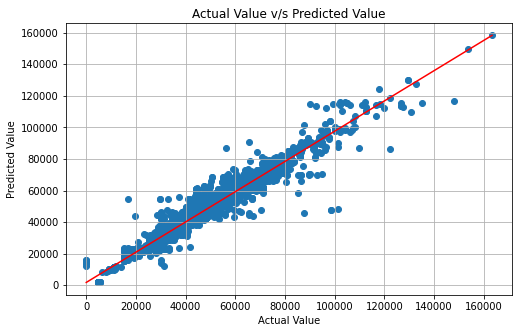

In [ ]:
# Plot regression line
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Value v/s Predicted Value")
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color="red")